# Hyun-Joon Yang
# BISC 478
# yanghyun@usc.edu
# HW4

In [1]:
from IPython.display import Image
from IPython.core.display import HTML

HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
.output_jpeg {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [2]:
import numpy as np
import pandas as pd

# Q1-4

#### Below are the un-normalized counts for a fictional RNA-seq experiment with only four genes.

In [3]:
df = pd.read_csv('data.csv')
df.index = ['A', 'B', 'C', 'D']
df

,Size,Condition 1-1,Condition 1-2,Condition 2-1,Condition 2-2
A,1,1000,2000,4000,3000
B,20,5000,10000,20000,15000
C,5,1500,3000,12000,9000
D,5,1000,2000,4000,3000


## 1. (10 pts) Compute RPKM.

In [4]:
def RPKM(df):
    df = df.copy()
    for i in range(df.shape[1]-1):
        i += 1
        total = df.iloc[:,i].sum()
        factor = total / 1000000
        df.iloc[:,i] = df.iloc[:,i] / factor
#     print(df)
    for i in range(df.shape[0]):
        df.iloc[i,1:] = df.iloc[i,1:] / df.iloc[i,0]
    return df


In [5]:
# print(df)
RPKM(df)

,Size,Condition 1-1,Condition 1-2,Condition 2-1,Condition 2-2
A,1,117647.058824,117647.058824,100000.0,100000.0
B,20,29411.764706,29411.764706,25000.0,25000.0
C,5,35294.117647,35294.117647,60000.0,60000.0
D,5,23529.411765,23529.411765,20000.0,20000.0


## 2. (10 pts) Compute TPM.

In [6]:
def TPM(df):
    df = df.copy()
    for i in range(df.shape[0]):
        df.iloc[i,1:] = df.iloc[i,1:] / df.iloc[i,0]
#     print(df)
    for i in range(df.shape[1]-1):
        i += 1
        total = df.iloc[:,i].sum()
        factor = total / 1000000
        df.iloc[:,i] = df.iloc[:,i] / factor
    return df


In [7]:
# print(df)
TPM(df)

,Size,Condition 1-1,Condition 1-2,Condition 2-1,Condition 2-2
A,1,571428.571429,571428.571429,487804.878049,487804.878049
B,20,142857.142857,142857.142857,121951.219512,121951.219512
C,5,171428.571429,171428.571429,292682.926829,292682.926829
D,5,114285.714286,114285.714286,97560.975610,97560.975610


## 3. (2 pts) Which (if any) of the four genes are expressed more under condition 2 than condition 1? (To answer this question, you do not need to do a statistical test.)

Gene C

## 4. (2 pts) Which of the four genes has the highest expression for condition 1? (To answer this question, you do not need to do a statistical test.)

Gene A

# Q5

## 5. (2 pts) Below is a Volcano Plot for a real RNA-seq experiment with many more genes than the example above. “Fold” is the gene expression under condition 1 divided by the gene expression under condition 2. Let N1 be the number of genes that are expressed significantly more under condition 1 than condition 2, and let N2 be the number of genes that are expressed significantly more under condition 2 than condition 1. Based on this plot, are N1 and N2 about equal, is N1 > N2, is N1 < N2, or is there not enough information to know?

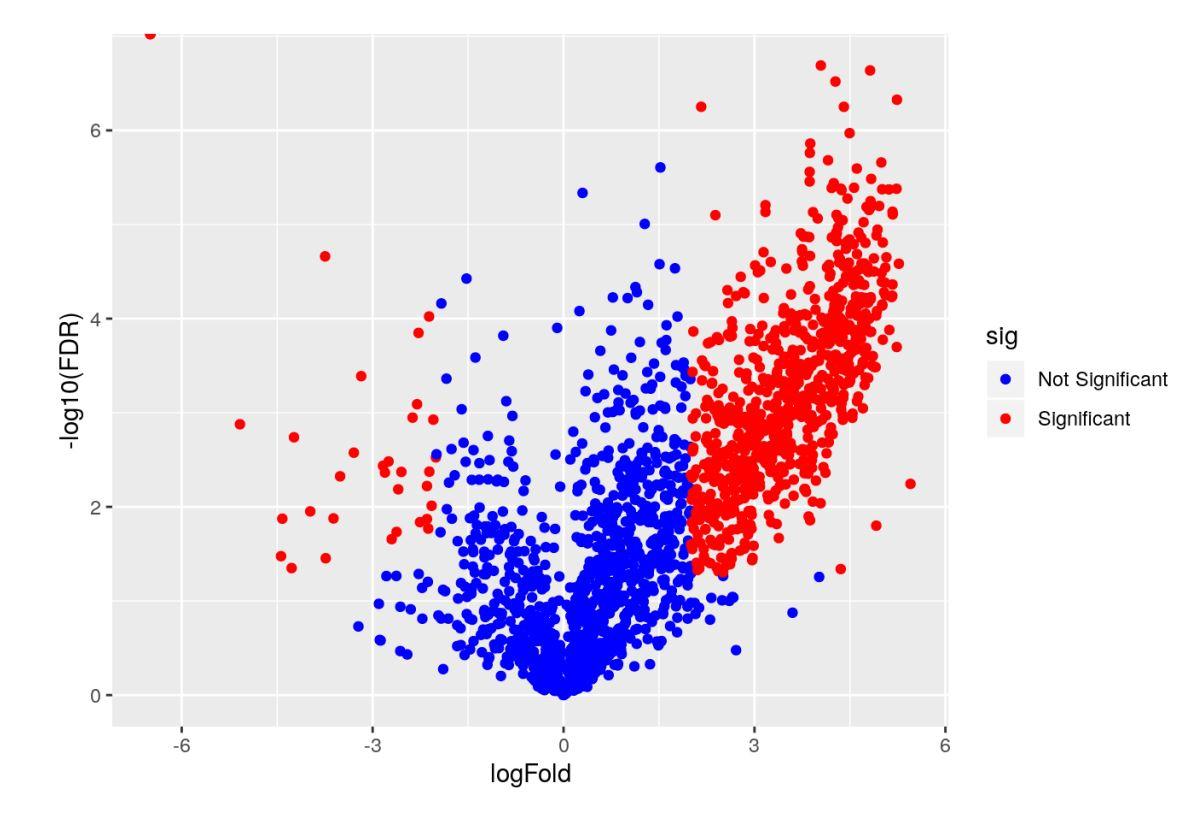

In [8]:
Image('img5-1.jpg')

Since there are more points where logFold is positive, N1 > N2.

# Q6-7

#### Below are ten un-adjusted p-values.


0.2, 0.6, 0.35, 0.33, 0.0001, 0.008, 0.88, 0.9, 0. 7, 0.62

In [9]:
pvs = np.array([0.2, 0.6, 0.35, 0.33, 0.0001, 0.008, 0.88, 0.9, 0.7, 0.62], dtype='float')
pvs

array([2.0e-01, 6.0e-01, 3.5e-01, 3.3e-01, 1.0e-04, 8.0e-03, 8.8e-01,
       9.0e-01, 7.0e-01, 6.2e-01])

## 6. (10 pts) Compute the ten adjusted p-values by the False Discovery Rate (Benjamini-Hochberg) procedure.

In [10]:
def FDR(pvs):
    pvs = pd.Series(np.sort(pvs), name='p-value')
    rank = pd.Series(np.arange(1,len(pvs)+1), name='rank')
    df = pd.concat([pvs, rank], axis=1)
    df['pre'] = df['p-value'] * df.shape[0] / df['rank']
    adjusted = np.empty(df.shape[0])
    adjusted[:] = np.nan
    adjusted = pd.Series(adjusted, name='adjusted')
    adjusted.iloc[-1] = df['pre'].iloc[-1]
    for i in range(df.shape[0], 1, -1):
        i -= 2
        adjusted.iloc[i] = min(adjusted.iloc[i+1], df['pre'].iloc[i])
    df = pd.concat([df, adjusted], axis=1)
    return df


In [11]:
FDR(pvs)

,p-value,rank,pre,adjusted
0,0.0001,1,0.001000,0.001000
1,0.0080,2,0.040000,0.040000
2,0.2000,3,0.666667,0.666667
3,0.3300,4,0.825000,0.700000
4,0.3500,5,0.700000,0.700000
5,0.6000,6,1.000000,0.875000
6,0.6200,7,0.885714,0.875000
7,0.7000,8,0.875000,0.875000
8,0.8800,9,0.977778,0.900000
9,0.9000,10,0.900000,0.900000


## 7. (2 pts) If instead of the FDR we had used the Bonferroni correction, how many of these ten p-values would be less than significance level $\alpha = 0.05$ after doing the Bonferroni correction?

$$\alpha^* = \frac{\alpha}{n} = \frac{0.05}{10} = 0.005 $$

Only 1

# Q8-9

#### An RNA-seq experiment is done to test for genes that are differentially expressed between conditions 1 and 2. The False Discovery Rate is set at 0.05.

## 8. (2 pts) After doing the FDR adjustment, 800 genes are significantly differentially expressed. About how many of these do we expect to be false positives? (You can give a numeric answer or say there is not enough information to know).

$$ FDR = V/R $$
$$ V = 0.05 \times 800 = 40 $$

## 9. (2 pts) After doing the FDR adjustment, 11,200 genes are not significantly differentially expressed. About how many of these do we expect to be false negatives? (You can give a numeric answer or say there is not enough information to know).

There is not enough information to know

# Q10

## 10. (3 pts) Imagine you have done an RNA-seq experiment similar to the example at the beginning of this HW, except you have data for all ~20,000 genes. Similar to this example, you find there is one gene that clearly has much higher expression than all the other genes under condition 1.
## A scientist disputes your finding. This scientist argues that there is a bias in RNA-seq experiments that is not taken into account by RPKM or TPM. This scientist claims that in addition to gene expression, the read count in an RNA-seq experiment also depends on the GC-content of the reads. In particular, reads with GC-content near 50% are counted more relative to reads with much lower or much higher GC-content.
## Describe a method to test this scientist’s claim. Assume you have data for many RNA-seq experiments, the DNA sequence of the reference genome, and the ability to write computer code. (Note: there is more than one correct response to this question.)

You could run RNA-seq on a sample with known levels of expression and GC-content. You can then normalize the result also accounting for the relative expression of the genes. Then you can plot the counts according to the GC-content of the gene. If the scientisti's claim is true, you would expect to find a normal distribution with the mean at GC-content=0.5 whereas if it is false, you would see a uniform distribution.